In [4]:



# Завдання 1.
# 1.	Розробити звичайний автокодувальник  для датасету
# рукописних цифр MNIST на основі багатошарової нейронної мережі.

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Перетворення вхідних даних до векторного формату
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
# Розмірність
encoding_dim = 32


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(encoding_dim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

# Компіляція
model.compile(optimizer='adam', loss='binary_crossentropy')



In [6]:
history = model.fit(x_train, x_train,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.2296 - val_loss: 0.1507
Epoch 2/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1350 - val_loss: 0.1207
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1160 - val_loss: 0.1096
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1083 - val_loss: 0.1045
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1044 - val_loss: 0.1017
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1016 - val_loss: 0.0992
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0993 - val_loss: 0.0973
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0974 - val_loss: 0.0953
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0958 - val_loss: 0.0941
Epoch 10/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0946 - val_lo

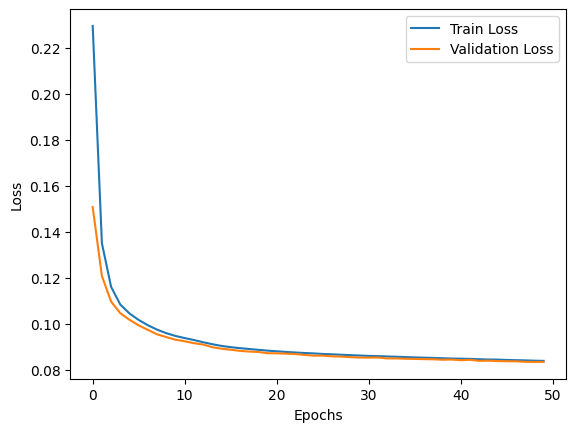

In [9]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# 2.	Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі.

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних та зміна формату
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 68s 144ms/step - loss: 0.1354 - val_loss: 0.1265
Epoch 2/10
469/469 [==============================] - 69s 146ms/step - loss: 0.1225 - val_loss: 0.1169
Epoch 3/10
469/469 [==============================] - 65s 139ms/step - loss: 0.1155 - val_loss: 0.1121
Epoch 4/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1115 - val_loss: 0.1089
Epoch 5/10
469/469 [==============================] - 64s 137ms/step - loss: 0.1087 - val_loss: 0.1066
Epoch 6/10
469/469 [==============================] - 67s 143ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 7/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1051 - val_loss: 0.1031
Epoch 8/10
469/469 [==============================] - 66s 141ms/step - loss: 0.1037 - val_loss: 0.1019
Epoch 9/10
469/469 [==============================] - 69s 146ms/step - loss: 0.1026 - val_loss: 0.1006
Epoch 10/10
469/469 [==============================] - 64s 136ms/step - l

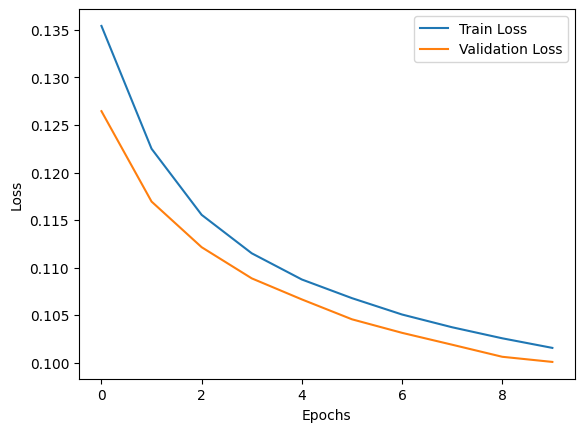

In [13]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()